[View in Colaboratory](https://colab.research.google.com/github/rainu1729/data-analysis/blob/master/EDXcourse600_2x.ipynb)

###edx course 600.2x

**Computational models**
----

Optimization models

Statistical models

Simulation models

**Optimization models**

Trying to answer the questions like finding the biggest,the smallest,
the most , the fewest , the fastest, the least expensive , there is a good change that we can map that problem onto a classic optimization problem for which there is a known computational solution.

Class Optimization problem,

has got two parts

1. Objective function that has be maximized or minimized
    
 2. Set of constraints that need to be satisfied.
 
 
 
 Many problems of real importance can be formulated as an optimization problem
 
 Reducing a seemingly new problem to an instance of a well-known problem allows one to use pre-existing methods for solving them.
 
 Solving optimization problems is computationally challenging(long running ones)
 
 A greedy algo is often a practical approach to finding a pretty good approximate solution to an optimization problem.

####**0/1 Knapsack problem**

In [0]:
class food(object):
    '''the food class it contains the name of the food followed by  its value and the calories
    there is init function, getters and rewritten __str__ fun'''
    def __init__(self,name,value,cost):
        self.name=name
        self.value=value
        self.calories=cost
    
    def getname(self):
        return self.name
    
    def getvalue(self):
        return self.value

    def getcalories(self):
        return self.calories

    def getcalpervalue(self):
        return self.calories/self.value

    def __str__(self):
        return self.name+' <'+str(self.value)+','+str(self.calories)+'>'

build the menu using the food

In [0]:
def themenu(name,value,calorie):
    """the menu is build using the food class and returns a list
    the name,value and calorie are list of same length
    """
    menu =[]
    for i in range(len(name)):
        menu.append(food(name[i],value[i],calorie[i]))
    return menu

the greedy algo in form of a function

In [0]:
def greedy(items,maxcost,keyfunction):
    """items is a list of menu, maxcost is a positive number
    based on the keyfunction a new list of items is created"""
    itemscopy =  sorted(items,key=keyfunction,reverse=True)
    result = []
    totalvalue,totalcal= 0.0,0.0
    for i in range(len(itemscopy)):
        if(totalcal+itemscopy[i].getcalories()<=maxcost):
            result.append(itemscopy[i])
            totalcal+=itemscopy[i].getcalories()
            totalvalue+=itemscopy[i].getvalue()
    
    return (result,totalvalue,totalcal)

** test the greedy function**

In [0]:
def testGreedy(items,constraint,keyFunction):
    """test function inputs are 
    items i.e the menu in form of a python list
    constraint as the max calorie value 
    the sorting keyfunction i.e any of the item parameter like calories,value,calories per value
    """
    taken,val,cal = greedy(items,constraint,keyFunction)
    print('total value of items taken ',val,' total cal ',cal)
    for item in taken:
        print(' ',item)

def testGreedys(foods,maxUnit):
    """RUN THE testGreedy function with diff keyfunctions and a fixed constraint
    the input is the foods a list containing object of type food.
    max calorie value which should not be exceed
    """
    print('use greedy by value to allocate ',maxUnit,' calories')
    testGreedy(foods,maxUnit,lambda x:food.getvalue(x))
    print('--------------------------------------------------------')
    print('use greedy by cost(calorie) to allocate ',maxUnit,' calories')
    testGreedy(foods,maxUnit,lambda x:1/food.getcalories(x))
    print('------------------------------------------------------')
    print('use greedy by density to allcocate ',maxUnit,' calories')
    testGreedy(foods,maxUnit,lambda x:food.getcalpervalue(x))

Sample data

In [0]:
name = ['wine','beer','pizza','burger','fries','coke','apple','donut']
value = [89,90,30,50,90,79,90,10]
calories = [123,154,258,354,365,150,95,195]

myfood=themenu(name,value,calories)

 implementing the brute force method to find the best fit

In [0]:
def maxVal(toConsider,avail):
    '''
    returns a tuple with items to take and its value
    inputs:
    toConsider : a list of available items
    avail      : available space
    '''
    if toConsider ==[] or avail ==0:
        ## returns a tuple with 0- value and empty items with the items toConsider is None or available space is zero.
        result =(0,0,())
    elif toConsider[0].getcalories() > avail:
        ## call the same maxVal function without current item if the current items calories is greater than available space.
        result = maxVal(toConsider[1:],avail)
    else:
        ## if the current item calories is below the available limit
        nextItem=toConsider[0]
        ## call the maxVal excluding the current item and reducing the available space
        withVal,withCal,withtoTake = maxVal(toConsider[1:],avail-nextItem.getcalories())
        withVal +=nextItem.getvalue()
        withCal +=nextItem.getcalories()
        ## considering the possiblity of exluding the current item and having the same available space
        withoutVal,withoutCal,withoutToTake=maxVal(toConsider[1:],avail)
        ## compare which is better in terms of maximizing the value with or without the current item.
        if withVal> withoutVal:
            result =(withVal,withCal,withtoTake+(nextItem,))
        else:
            result =(withoutVal,withoutCal,withoutToTake)
    return result

 CREATING A RANDOM LIST OF FOOD , ITS VALUE AND CALORIE so that  MENU can be created 


In [0]:
def crListMenu(itemcount):
    '''
    returns a list with itemcount no of items as menu
    '''
    import itertools as it
    from random import randint
    string='Abcdefghijklmnopqsrstuvwxyz'
    comps=it.permutations(string, 4)
    food=[]
    value=[]
    calories=[]
    for i in range(itemcount):
        food.append(''.join(next(comps)))
        value.append(randint(5,89))
        calories.append(randint(91,208))
    myfood=themenu(food,value,calories)
    return myfood

**Memoization **

very useful for recursive problems

example is fibonacci sequences -- store fib(x) is a dictonary to be used.

**Dynamic Programming**

--Richard Bellman

trading time(program execution) for space(memory)

When is dynamic programming sutible

Optimal substructure-- a global optimal solution can be found by combining optimal solutions to local subproblems.
eg: fib(x) = fib(x-1) +fib(x-2)

Overlapping subproblems : finding an optimal solution inovles sovling the same problem multiple times.

using the dyamic programming create a fast version of maxVal

In [0]:
def fastMaxVal(toConsider,avail,memo={}):
    '''
    toConsider : list of items from menu
    avail      : available space in menu
    mem        : is a dictonary storing key values
    '''
    if (len(toConsider),avail) in memo:
        result = memo[(len(toConsider),avail)]
    elif toConsider == [] or avail ==0:
        result =(0,0,())
    elif toConsider[0].getcalories() > avail:
        result = fastMaxVal(toConsider[1:],avail,memo)
    else:
        ## if the current item calories is below the available limit
        nextItem=toConsider[0]
        ## call the maxVal excluding the current item and reducing the available space
        withVal,withCal,withtoTake = fastMaxVal(toConsider[1:],avail-nextItem.getcalories(),memo)
        withVal +=nextItem.getvalue()
        withCal +=nextItem.getcalories()
        ## considering the possiblity of exluding the current item and having the same available space
        withoutVal,withoutCal,withoutToTake=fastMaxVal(toConsider[1:],avail,memo)
        ## compare which is better in terms of maximizing the value with or without the current item.
        if withVal> withoutVal:
            result =(withVal,withCal,withtoTake+(nextItem,))
        else:
            result =(withoutVal,withoutCal,withoutToTake)
    memo[(len(toConsider),avail)] = result 
    return result

## test max val

In [0]:
def testMaxVal(foods,maxUnits,algo,printItems= True):
    print('Using search tree to alloacate ',maxUnits,' calories')
    val,cal,taken=algo(foods,maxUnits)
    print('total value of items taken ',val,' total cal ',cal)
    if printItems:
        for item in taken:
            print(' ',item)

### creating menu with n items and testing the algos

In [0]:
for numitems in (2,4,8,32,64,128,256,512,1024):
    items = crListMenu(numitems)
    testMaxVal(items,750,fastMaxVal)

Using serach tree to alloacate  750  calories
total value of items taken  80  total cal  237
  Abce <44,111>
  Abcd <36,126>
Using serach tree to alloacate  750  calories
total value of items taken  174  total cal  568
  Abcg <65,164>
  Abcf <22,201>
  Abce <63,97>
  Abcd <24,106>
Using serach tree to alloacate  750  calories
total value of items taken  374  total cal  725
  Abcj <67,138>
  Abci <64,179>
  Abch <87,114>
  Abcg <83,110>
  Abcf <73,184>
Using serach tree to alloacate  750  calories
total value of items taken  502  total cal  745
  Abdh <88,115>
  Abcv <80,99>
  Abcr <82,143>
  Abcj <86,156>
  Abch <81,139>
  Abcg <85,93>


# Graph class

####Node class

In [0]:
class Node(object):
    ''' Node class with single attribute name'''
    def __init__(self,name):
        self.name=name
    
    def getName(self):
        return self.name

    def __str__(self):
        return self.name

####Edge class

In [0]:
class Edge(object):
    ''' edge connects two nodes src and dest are objects of class Node'''
    def __init__(self,src,dest):
        self.src=src
        self.dest=dest
    
    def getSource(self):
        return self.src

    def getDestination(self):
        return self.dest
    
    def __str__(self):
        return self.src.getName() + '->'+ self.dest.getName()

####Directed Graph

In [0]:
class Diagraph(object):
    '''Class directed graph edges is dictonary mapping each node to a list of its children'''

    def __init__(self):
        self.edges={}

    def addNode(self,node):
        # if given node is presnt in the dict edges raise a Duplicate error
        if node in self.edges:
            raise ValueError('Duplicate error')
        # if not present , add the node as key in edges dict with an empty list value.
        else:
            self.edges[node]=[]
    
    def addEdge(self,edge):
        src = edge.getSource()
        dest= edge.getDestination()
        # if src node or dest node not present in the edges dict then raise node not in graph
        if not (src in self.edges and dest in self.edges):
            raise ValueError('Node not in graph')
        #else in the edges dict add a key src with and append dest to the list of value
        self.edges[src].append(dest)

    # checks and returns the value i.e a list of childs against a given node 
    def childrenOf(self,node):
        return self.edges[node]
    
    # checks and returns the node if present in the dict of all the edges
    def hasNode(self,node):
        return node in self.edges
           
    #returns the name of the node if present in the dict edges
    def getNode(self,name):
        for n in self.edges:
            if n.getName()== name:
                return n
        raise NameError(name)
    
    
    # overwriting the __str__ method to print all the edges in graph as src -> dest
    def __str__(self):
        result = ''
        for src in self.edges:
            for dest in self.edges[src]:
                result = result + src.getName() + '->' +dest.getName ()+'\n'
        return result[:-1]

####bidirectional graph class inherits from graph class

In [0]:
class Graph(Diagraph):
    # over writing the addEdge method of Diagraph class, i.e adds edges in both direction
    def addEdge(self,edge):
        Diagraph.addEdge(self,edge)
        rev = Edge(edge.getDestination(),edge.getSource())
        Diagraph.addEdge(self,rev)

####Depth First Search

In [0]:
def printPath(path):
    ''' path is a list'''
    result=''
    for i in range(len(path)):
        result = result +'->'+str(path[i])
    return result

def DFS(graph,start,end,path,shortest,toPrint=True):
    # add the start node to the path list
    path= path+[start]
    
    if toPrint:
        print('current DFS path:',printPath(path))
    # check if start node and end node are same 
    if start ==end:
        return path
    # iterate through all the nodes which are child of the given start point
    for node in graph.childrenOf(start):
        # check if the child node is present in the existing path
        if node not in path:
            if shortest == None or len(path) < len(shortest):
                newPath = DFS(graph,node,end,path,shortest,toPrint)

                if newPath!=None:
                    shortest = newPath
        elif toPrint:
            print('already visited node ',node)
    
    return shortest

####Build a graph

In [0]:
def buildCityGraph(typeOfGraph):
    nodes = []
    nodes.append(Node("ABC")) # nodes[0]
    nodes.append(Node("ACB")) # nodes[1]
    nodes.append(Node("BAC")) # nodes[2]
    nodes.append(Node("BCA")) # nodes[3]
    nodes.append(Node("CAB")) # nodes[4]
    nodes.append(Node("CBA")) # nodes[5]

    gObject = typeOfGraph()
    for n in nodes:
        gObject.addNode(n)

    gObject.addEdge(Edge(nodes[0],nodes[1]))
    gObject.addEdge(Edge(nodes[0],nodes[2]))
    gObject.addEdge(Edge(nodes[1],nodes[4]))
    gObject.addEdge(Edge(nodes[2],nodes[3]))
    gObject.addEdge(Edge(nodes[3],nodes[5]))
    gObject.addEdge(Edge(nodes[4],nodes[5]))
    return gObject

####Extract the shortest path

In [0]:
def shortestPath(graph,start,end):
    # wrapper function requires input as graph,start and end points
    return DFS(graph,start,end,[],None)

def testSP(source,destination):
    # test function requires only the source and destination
    typeOfGraph=Graph
    g=buildCityGraph(typeOfGraph)
    sp=shortestPath(g,g.getNode(source),g.getNode(destination))

    if sp!=None:
        print('shortest path from ',source, ' to ',destination, 'is ',printPath(sp))

    else:
        print('there is no path from ',source,' to ',destination)

In [0]:
print(testSP('BCA','ACB'))

current DFS path: ->BCA
current DFS path: ->BCA->BAC
current DFS path: ->BCA->BAC->ABC
current DFS path: ->BCA->BAC->ABC->ACB
already visited node  BAC
already visited node  BCA
current DFS path: ->BCA->CBA
already visited node  BCA
current DFS path: ->BCA->CBA->CAB
current DFS path: ->BCA->CBA->CAB->ACB
already visited node  CBA
shortest path from  BCA  to  ACB is  ->BCA->CBA->CAB->ACB
None


--------------------
####Plotting data with pyplot


In [0]:
## computes and returns the saving accured at the end of each year.
## rate is annual, terms is in months and monthly is the every month contribution
def retire(monthly, rate, terms):
    savings =[0]
    base = [0]
    mRate = rate/12
    for i in range(terms):
        base +=[i]
        savings += [savings[-1]*( 1 + mRate)+monthly]
    
    return [m/12 for m in base], savings

Display results

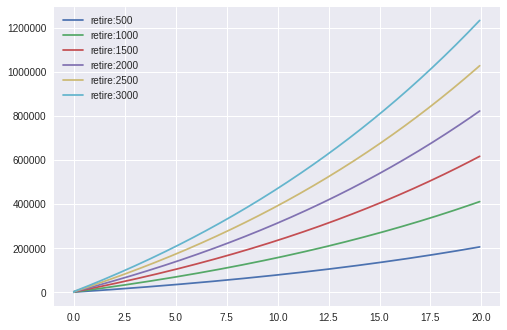

In [0]:

import matplotlib.pyplot as plt
#varying monthly investments
def displayRetireVM(monthlies,rate,terms):
    plt.figure('retireMonth')
    plt.clf() #clear previous figures
    for monthly in monthlies:
        xvals,yvals = retire(monthly,rate,terms)
        plt.plot(xvals,yvals,label ='retire:'+str(monthly))
        plt.legend(loc ='upper left')
        
displayRetire([500,1000,1500,2000,2500,3000],0.05,20*12)

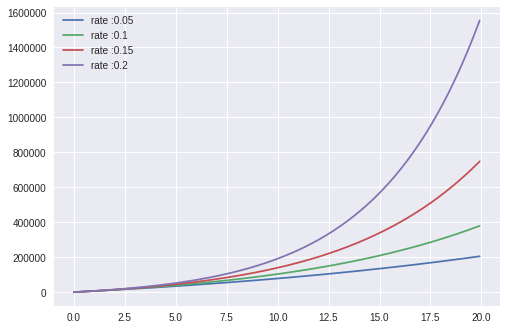

In [0]:
import matplotlib.pyplot as plt
#varying interest rates
def displayRetireVR(monthlies,rate,terms):
    plt.figure('retireMonth')
    plt.clf() #clear previous figures
    for arate in rate:
        xvals,yvals = retire(monthlies,arate,terms)
        plt.plot(xvals,yvals,label ='rate :'+str(arate))
        plt.legend(loc ='upper left')
        
        
displayRetireVR(500,[0.05,0.10,0.15,0.20],20*12)

#### Stochastic process
 
 A Stochastic model is one in which randomness is present, and variable states are not described by unique values, but rather by probability distributions. The behavior of this model cannot be entirely predicted

In [0]:
#generate random even number from 0 <= x<100
import random

random.randrange(10,21,2)

16

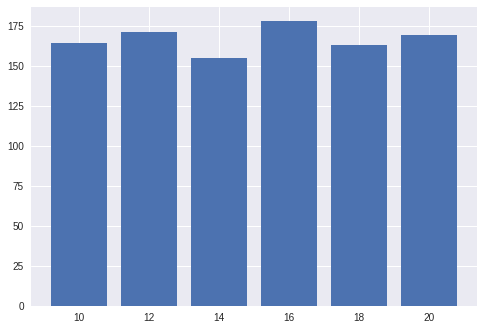

In [0]:
import matplotlib.pyplot as plt

result=[]

for _ in range(0,1000):
    result.append(random.randrange(10,21,2))

#x = [a for a in range(10,21,2)]

from collections import Counter
result = sorted(result)
#print(result)
y = Counter(result)

plt.bar(range(len(y)), list(y.values()), align='center')
plt.xticks(range(len(y)), list(y.keys()))

plt.show()

Excerise 4 

In [0]:
import random

def dist1():
    return random.random() * 2 - 1

def dist2():
    if random.random() > 0.5:
        return random.random()
    else:
        return random.random() - 1 
    
def dist3():
    return int(random.random() * 10)

def dist4():
    return random.randrange(0, 10)

def dist5():
    return int(random.random() * 10)

def dist6():
    return random.randint(0, 10)

import numpy as np

def rundistribution(funname,no_itr=1000):
    x,y=[],[]
    for i in range(no_itr):
        x=np.append(x,i)
        y=np.append(y,funname())
    return x,y
        
print('done')

done


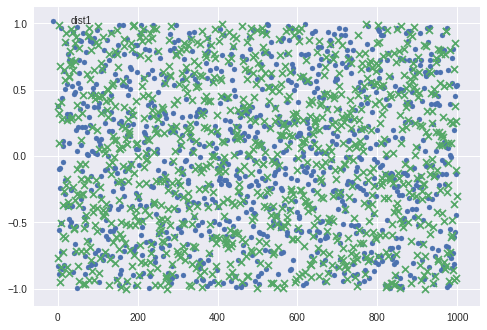

In [0]:
#printing all the distributions 

import matplotlib.pyplot as plt

for _ in range(6):
    plt.figure('all distributions')




plt.figure('dist1')
plt.clf() #clear previous figures
xvals,yvals = rundistribution(dist1)




#plt.plot(xvals,yvals,label ='dist1',)
plt.scatter(xvals, yvals,label ='dist1', marker='.', s=10)
plt.legend(loc ='upper left')

x2vals,y2vals = rundistribution(dist2)

plt.scatter(x2vals,y2vals,label ='dist2', marker='x')
plt.show()

####Probability

1. Probabilites are always in range 0 to 1.

2. If probability of an event occuring is p, then probability of it not occuring must be 1-p.

3. when events are **independent** of each other , the probability of the events occuring is equal to the product of the probability of each of the events occuring.

Two events are said to be independent if the outcome of one event has no influence on the outcome of the other.


In [0]:
## defining roll a Die function and its test case
import random

def rollDie():
    return random.choice([1,2,3,4,5,6])

def testRoll(n=10):
    result =''
    for _ in range(n):
        result = result+str(rollDie())
    print(result)

In [0]:
##runn the test function for roll Die
testRoll()

2214252111


In [0]:
## A simulation of desired result.
## goal -- running rollDie n no of times i.e len(goal) times
## numTrials -- no of trials 
def runSim(goal,numTrials):
    total = 0
    for i in range(numTrials):
        result=''
        for _ in range(len(goal)):
            result +=str(rollDie())
            
            if result==goal:
                total += 1
        ## for a 6 face die        
    print('Actual probability =',round(1/(6**len(goal)),8))
    print('Estima probability =',round((total/numTrials),8))

runSim('111',1000)


Actual probability = 0.00462963
Estima probability = 0.00462


it takes a lot of trials(by increasing the numTrials) to get a good estimate of the frequency of occurence of a rare event.

Sample probability and actual probability are different.

####Simulation Models

A description of computations that provide useful information about the possible behaviours of th e system being modeled.

Its descriptive in nature i.e they are used to tell what might happen . They don't tell us how to make something happen.

A simulation is only an approximation to reality.

"All models are wrong, but some are useful." --George Box

--- to model systems that are mathematically intractable
--- to extract useful intermediate results
--- lend themselves to development by successive refinement and "what if " questions.

**A Random walk down Wall Street.** book to read



####Simulating a random walk

In [0]:
## a class to give location

class location(object):
    '''return the new location after a step is taken'''
    def __init__(self,x,y):
        '''x and y are floats'''
        self.x = x
        self.y = y
        
    def move(self,deltaX,deltaY):
        '''deltaX and deltaY are floats
           returns a new location moved by deltaX,deltaY
        '''
        return location(self.x+deltaX,self.y+deltaY)
    
    def getX(self):
        '''return the current x location'''
        return self.x
    
    def getY(self):
        '''return the current y location'''
        return self.y
    
    def distFrom(self,other):
        '''returns the distance between current location(x,y) and other location'''
        ox = other.x
        oy = other.y
        xDist = self.x - ox
        yDist = self.y - oy
        return (xDist**2+yDist**2)**0.5
    
    def __str__(self):
        return '('+str(self.x)+','+str(self.y)+')' 

In [0]:
#Drunk person class

class Drunk(object):
    '''initialize the name of the person'''
    def __init__(self,name):
        self.name=name
        
    def __str__(self):
        return 'The name is '+self.name

# inherit the above class and create two types of drunks

import random

class UsualDrunk(Drunk):
    '''no bias in direction of step taken
       the choice of step is given as (x,y) e.g (0,1) -- moving north by 1 step
    '''
    def takeStep(self):
        #[N,S,E,W]
        stepChoice=[(0.0,1.0),(0.0,-1.0),(1.0,0.0),(-1.0,0.0)]
        return random.choice(stepChoice)
    
class ColdDrunk(Drunk):
    #bias in direction of step taken
    
    def takeStep(self):
        #[N,S,E,W]
        stepChoice=[(0.0,0.9),(0.0,-1.1),(1.0,0.0),(-1.0,0.0)]  
        return random.choice(stepChoice)
    

The field class, was made to make the location of a person in a field an attribute of the field rather than an attribute of the person.

In [0]:
class Field(object):
    '''Field class tracks all the drunks'''
    
    def __init__(self):
        '''Create an empty dictonary the key is the drunk and
        value is the location'''
        self.drunks={}
        
    def addDrunk(self,drunk,loc):
        '''Add the drunk to the field with location'''
        
        if drunk in self.drunks:
            raise ValueError('Drunk already on field change position')
        
        else:
            # if drunk not present on field then add to the field
            self.drunks[drunk]=loc
    
    def getLoc(self,drunk):
        '''get the location of a drunk of field'''
        
        if drunk not in self.drunks:
            raise ValueError('Drunk not on field')
            
        return self.drunks[drunk]
    
    
    def moveDrunk(self,drunk):
        '''make the drunk take a step'''
        # check whether drunk is in field
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field')
            
        xDist,yDist = drunk.takeStep()
        currentLocation = self.drunks[drunk]
        
        #use move method of location to get new location
        self.drunks[drunk]=currentLocation.move(xDist,yDist)
     

In [0]:
#simulate a single Single walk

def walk(f,d,numSteps):
    '''f is field 
       d is person 
       numSteps is no of steps a positive number
       Move d numSteps times return the distance between start and end
       '''
    #get the current location of the drunk
    start = f.getLoc(d)
    
    for _ in range(numSteps):
        f.moveDrunk(d)
    return start.distFrom(f.getLoc(d))

In [0]:
# simulate multiple walks 

def simWalks(numSteps,numTrials,dClass):
    '''Assume numSteps and numTrials are positive int
       dClass is a subtype of Drunk class
       numTrials -- simulates walk of steps numSteps numTrials no of times
       returns a list containing distance travelled for each trial
    '''
    #create an object
    Homer = dClass('John')
    #initial location
    origin = location(1,0)
    distances =[]
    for _ in range(numTrials):
        
        # create a field
        f = Field()
        
        #add the drunk to the field at origin
        f.addDrunk(Homer,origin)
        distances.append(walk(f,Homer,numSteps))
    
    return distances
    

In [0]:
###doing the test run

def drunkTest(walkLengths,numTrials,dClass):
    '''Assume walklength is a tuple with length of walks
       numTrials is the no of trials
       dClass is type of drunk UsualDrunk or ColdDrunk
       
       for each number of steps in walkLengths, runs simWalks with numTrials 
       walks and prints results
    '''
    
    for numSteps in walkLengths:
        distances = simWalks(numSteps,numTrials,dClass)
        
        print(dClass.__name__,' walks ',numSteps,' steps')
        print('Mean =',round(sum(distances)/len(distances),4), \
        'Max =',max(distances), \
         'Min =',min(distances) )
        

In [0]:
### testing the walks for the drunks

drunkTest((10,100,1000),1000,UsualDrunk)

drunkTest((10,100,1000),1000,ColdDrunk)

UsualDrunk  walks  10  steps
Mean = 2.8471 Max = 8.246211251235321 Min = 0.0
UsualDrunk  walks  100  steps
Mean = 8.9153 Max = 24.413111231467404 Min = 0.0
UsualDrunk  walks  1000  steps
Mean = 27.7732 Max = 72.069410986909 Min = 1.4142135623730951
ColdDrunk  walks  10  steps
Mean = 2.7295 Max = 7.963039620647383 Min = 0.0
ColdDrunk  walks  100  steps
Mean = 9.8867 Max = 31.515869018638877 Min = 0.2000000000000014
ColdDrunk  walks  1000  steps
Mean = 54.5655 Max = 118.853859844768 Min = 2.0880613017821337


**Plotting the random walk to look at simulation**

In [0]:
## a style class it will be used to represent the walks of different persons

class styleIterator(object):
    
    def __init__(self,styles):
        # styles is a tuple of diff styles to plot
        # index 0 has the color and rest have the ticks
        self.index = 0
        self.styles = styles
        
    def nextStyle(self):
        result = self.styles[self.index]
        
        if self.index == len(self.styles)-1:
            self.index = 0
            
        else:
            self.index+=1
        return result

In [0]:
def simDrunk(numTrials,dClass,walkLengths):
    '''returns a list of mean distances for each trial'''
    meanDistances =[]
    # iterate through all the walkLengths 10 steps 100 steps etc
    for numSteps in walkLengths:
        
        #print('Starting simulation of ',numSteps,' steps')
        #returns a list will distance for each trial
        trails = simWalks(numSteps,numTrials,dClass)
        
        mean = sum(trails)/len(trails)
        meanDistances.append(mean)
     
    return meanDistances

In [0]:
import matplotlib.pyplot as plt

import numpy as np

def simAll(drunkKinds,walkLengths,numTrials):
    '''simulate diff kinds of drunk'''
    
    styleChoice = styleIterator(('b-','g--','r-.'))
    
    plt.figure('Simulate Drunk')
    plt.clf()
    for dClass in drunkKinds:
        
        curStyle = styleChoice.nextStyle()
        
        print('Simulate the ',dClass.__name__)
        #collect the list of means
        means = simDrunk(numTrials,dClass,walkLengths)
        
        #plot the mean distance vs steps
        plt.plot(walkLengths,means,curStyle,label=dClass.__name__)
        plt.title('Mean dist frm origin '+str(numTrials)+' trials')
        plt.xlabel('No of steps')
        plt.ylabel('Dist from orgin')
        plt.legend(loc='best')
    





Simulate the  ColdDrunk
Simulate the  UsualDrunk


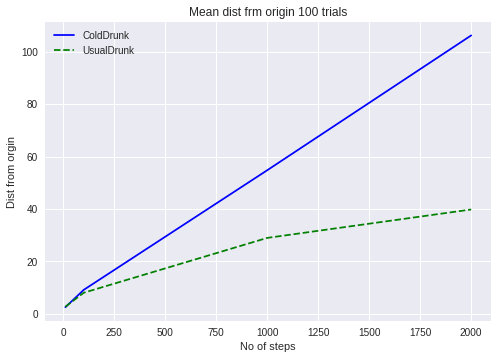

In [0]:
numSteps=(10,100,1000,2000)
simAll((ColdDrunk,UsualDrunk),numSteps,100)

In [0]:
def getFinalLocs(numSteps,numTrials,dClass):
    '''returns a list of locations which gives the location of 
    drunk after each trail'''
    
    locs=[]
    d = dClass('John')
    for _ in range(numTrials):
        f = Field()
        f.addDrunk(d,location(0,0))
        
        for _ in range(numSteps):
            f.moveDrunk(d)
        locs.append(f.getLoc(d))
        
    return locs

In [0]:
### plot the ending locations

def plotLocs(drunkKinds,numSteps,numTrials):
    styleChoice = styleIterator(('b*','r^','mo'))
    
    
    for dClass in drunkKinds:
        print('simulate for dClass '+dClass.__name__)
        locs = getFinalLocs(numSteps,numTrials,dClass)
        
        xVals,yVals =[],[]
        
        for loc in locs:
            xVals.append(loc.getX())
            yVals.append(loc.getY())
        
        #to get the absolute value of array using abs
        xVals = np.array(xVals)
        yVals = np.array(yVals)
        
        meanX = sum(abs(xVals))/len(xVals)
        meanY = sum(abs(yVals))/len(yVals)
        curStyle = styleChoice.nextStyle()
        plt.plot(xVals,yVals,curStyle,label = dClass.__name__ +' mean dist =<'+ str(round(meanX,2)) +',' +str(round(meanY,2))+'>')
        #
        plt.title('Location at end of a walk '+ str(numSteps)+' steps')
        
        plt.xlabel('Steps East/West of origin')
        plt.ylabel('Steps North/South of origin')
        
        plt.legend(loc ='upper left')

In [0]:
### different types of drunks
import math
class UsualDrunk(Drunk):
    def takeStep(self):
        stepChoices =\
            [(0.0,1.0), (0.0,-1.0), (1.0, 0.0), (-1.0, 0.0)]
        return random.choice(stepChoices)

class ColdDrunk(Drunk):
    def takeStep(self):
        stepChoices =\
            [(0.0,0.9), (0.0,-1.03), (1.03, 0.0), (-1.03, 0.0)]
        return random.choice(stepChoices)

class EDrunk(Drunk):
    def takeStep(self):
        ang = 2 * math.pi * random.random()
        length = 0.5 + 0.5 * random.random()
        return (length * math.sin(ang), length * math.cos(ang))

class PhotoDrunk(Drunk):
    def takeStep(self):
        stepChoices =\
                    [(0.0, 0.5),(0.0, -0.5),
                     (1.5, 0.0),(-1.5, 0.0)]
        return random.choice(stepChoices)

class DDrunk(Drunk):
    def takeStep(self):
        stepChoices =\
                    [(0.85, 0.85), (-0.85, -0.85),
                     (-0.56, 0.56), (0.56, -0.56)] 
        return random.choice(stepChoices)

In [0]:
# function to return distance 
def walkVector(f, d, numSteps):
  '''returns the actual x and y distance from the start point to the end point of a random walk
     f is field 
     d is person 
     numSteps is no of steps a positive number
  '''
  start = f.getLoc(d)
  for _ in range(numSteps):
    f.moveDrunk(d)
  return(f.getLoc(d).getX() - start.getX(),f.getLoc(d).getY() - start.getY())

In [0]:
def getFinalLocsVectors(numSteps,numTrials,dClass):
    '''returns a list of locations which gives the location of 
    drunk after each Trial'''
    
    locs=[]
    d = dClass('John')
    for _ in range(numTrials):
        f = Field()
        f.addDrunk(d,location(0,0))
        
        locs.append(walkVector(f,d,numSteps))
    #print('no of locs is ',len(locs))    
    return locs

In [0]:
#plot distance travelled 

def plotX_Y_distance(drunkKinds,numSteps,numTrials):
    styleChoice = styleIterator(('b*','r^','mo'))
    
    
    for dClass in drunkKinds:
        print('simulate for dClass '+dClass.__name__)
        locs = getFinalLocsVectors(numSteps,numTrials,dClass)
        
        xVals,yVals =[],[]
        for loc in locs:
            xVals.append(loc[0])
            yVals.append(loc[1])
        
        #to get the absolute value of array using abs
        xVals = np.array(xVals)
        yVals = np.array(yVals)
        
        meanX = sum(abs(xVals))/len(xVals)
        meanY = sum(abs(yVals))/len(yVals)
        curStyle = styleChoice.nextStyle()
        plt.plot(xVals,yVals,curStyle,label = dClass.__name__ +' mean dist =<'+ str(round(meanX,2)) +',' +str(round(meanY,2))+'>')
        #
        plt.title('Distance from origin at end of a walk '+ str(numSteps)+' steps')
        
        plt.xlabel('Steps East/West of origin')
        plt.ylabel('Steps North/South of origin')
        
        plt.legend(loc ='upper left')


simulate for dClass UsualDrunk
simulate for dClass DDrunk


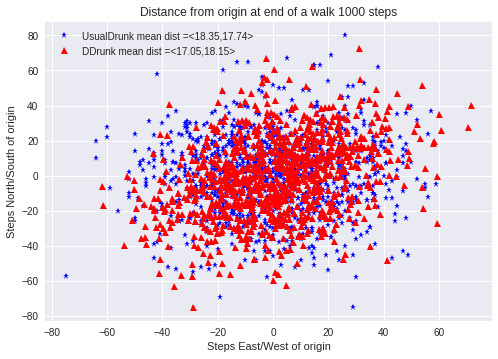

In [0]:


#plotLocs((ColdDrunk,),1000,100)
plotX_Y_distance((UsualDrunk,DDrunk,),1000,1000)

####6.00.2x Problem Set 2: Simulating robots

In [0]:

import math

import random

import time


import matplotlib.pyplot as plt

from tkinter import *

In [0]:
class RobotVisualization:
    def __init__(self, num_robots, width, height, delay = 0.2):
        "Initializes a visualization with the specified parameters."
        # Number of seconds to pause after each frame
        self.delay = delay

        self.max_dim = max(width, height)
        self.width = width
        self.height = height
        self.num_robots = num_robots

        # Initialize a drawing surface
        self.master = Tk()
        self.w = Canvas(self.master, width=500, height=500)
        self.w.pack()
        self.master.update()

        # Draw a backing and lines
        x1, y1 = self._map_coords(0, 0)
        x2, y2 = self._map_coords(width, height)
        self.w.create_rectangle(x1, y1, x2, y2, fill = "white")

        # Draw gray squares for dirty tiles
        self.tiles = {}
        for i in range(width):
            for j in range(height):
                x1, y1 = self._map_coords(i, j)
                x2, y2 = self._map_coords(i + 1, j + 1)
                self.tiles[(i, j)] = self.w.create_rectangle(x1, y1, x2, y2,
                                                             fill = "gray")

        # Draw gridlines
        for i in range(width + 1):
            x1, y1 = self._map_coords(i, 0)
            x2, y2 = self._map_coords(i, height)
            self.w.create_line(x1, y1, x2, y2)
        for i in range(height + 1):
            x1, y1 = self._map_coords(0, i)
            x2, y2 = self._map_coords(width, i)
            self.w.create_line(x1, y1, x2, y2)

        # Draw some status text
        self.robots = None
        self.text = self.w.create_text(25, 0, anchor=NW,
                                       text=self._status_string(0, 0))
        self.time = 0
        self.master.update()

    def _status_string(self, time, num_clean_tiles):
        "Returns an appropriate status string to print."
        percent_clean = round(100 * num_clean_tiles / (self.width * self.height))
        return "Time: %04d; %d tiles (%d%%) cleaned" % \
            (time, num_clean_tiles, percent_clean)

    def _map_coords(self, x, y):
        "Maps grid positions to window positions (in pixels)."
        return (250 + 450 * ((x - self.width / 2.0) / self.max_dim),
                250 + 450 * ((self.height / 2.0 - y) / self.max_dim))

    def _draw_robot(self, position, direction):
        "Returns a polygon representing a robot with the specified parameters."
        x, y = position.getX(), position.getY()
        d1 = direction + 165
        d2 = direction - 165
        x1, y1 = self._map_coords(x, y)
        x2, y2 = self._map_coords(x + 0.6 * math.sin(math.radians(d1)),
                                  y + 0.6 * math.cos(math.radians(d1)))
        x3, y3 = self._map_coords(x + 0.6 * math.sin(math.radians(d2)),
                                  y + 0.6 * math.cos(math.radians(d2)))
        return self.w.create_polygon([x1, y1, x2, y2, x3, y3], fill="red")

    def update(self, room, robots):
        "Redraws the visualization with the specified room and robot state."
        # Removes a gray square for any tiles have been cleaned.
        for i in range(self.width):
            for j in range(self.height):
                if room.isTileCleaned(i, j):
                    self.w.delete(self.tiles[(i, j)])
        # Delete all existing robots.
        if self.robots:
            for robot in self.robots:
                self.w.delete(robot)
                self.master.update_idletasks()
        # Draw new robots
        self.robots = []
        for robot in robots:
            pos = robot.getRobotPosition()
            x, y = pos.getX(), pos.getY()
            x1, y1 = self._map_coords(x - 0.08, y - 0.08)
            x2, y2 = self._map_coords(x + 0.08, y + 0.08)
            self.robots.append(self.w.create_oval(x1, y1, x2, y2,
                                                  fill = "black"))
            self.robots.append(
                self._draw_robot(robot.getRobotPosition(), robot.getRobotDirection()))
        # Update text
        self.w.delete(self.text)
        self.time += 1
        self.text = self.w.create_text(
            25, 0, anchor=NW,
            text=self._status_string(self.time, room.getNumCleanedTiles()))
        self.master.update()
        time.sleep(self.delay)

    def done(self):
        "Indicate that the animation is done so that we allow the user to close the window."
        mainloop()

In [0]:
def testRobotMovement(robot_type, room_type, delay=0.4):
    """
    Runs a simulation of a single robot of type robot_type in a 5x5 room.
    """
    #import ps2_visualize
    room = room_type(5, 5)
    robot = robot_type(room, 1)
    anim = RobotVisualization(1, 5, 5, delay)
    while room.getNumCleanedTiles() < room.getNumTiles():
        robot.updatePositionAndClean()
        anim.update(room, [robot])

    anim.done()


In [0]:
# === Provided class Position
class Position(object):
    """
    A Position represents a location in a two-dimensional room.
    """
    def __init__(self, x, y):
        """
        Initializes a position with coordinates (x, y).
        """
        self.x = x
        self.y = y
        
    def getX(self):
        return self.x
    
    def getY(self):
        return self.y
    
    def getNewPosition(self, angle, speed):
        """
        Computes and returns the new Position after a single clock-tick has
        passed, with this object as the current position, and with the
        specified angle and speed.

        Does NOT test whether the returned position fits inside the room.

        angle: number representing angle in degrees, 0 <= angle < 360
        speed: positive float representing speed

        Returns: a Position object representing the new position.
        """
        old_x, old_y = self.getX(), self.getY()
        angle = float(angle)
        # Compute the change in position hypotenus*cos(theta) and  hypotenus*sin(theta)
        delta_y = speed * math.cos(math.radians(angle))
        delta_x = speed * math.sin(math.radians(angle))
        # Add that to the existing position
        new_x = old_x + delta_x
        new_y = old_y + delta_y
        return Position(new_x, new_y)

    def __str__(self):  
        return "(%0.2f, %0.2f)" % (self.x, self.y)

In [0]:

# === Problem 1

from collections import defaultdict

import itertools

import numpy as np

import math

class RectangularRoom(object):
    """
    A RectangularRoom represents a rectangular region containing clean or dirty
    tiles.

    A room has a width and a height and contains (width * height) tiles. At any
    particular time, each of these tiles is either clean or dirty.
    """
    def __init__(self, width, height):
        """
        Initializes a rectangular room with the specified width and height.

        Initially, no tiles in the room have been cleaned.

        width: an integer > 0
        height: an integer > 0
        """
        self.width = width
        self.height = height
        self.room = dict()
        self.room = defaultdict(lambda : 0,self.room)
        # putting all the keys by creating a cross product of two lists
        # of length width , height
        wdtlist = [b for b in range(0,width,1)]
        heilist = [b for b in range(0,height,1)]
        
        for x,y in itertools.product(wdtlist,heilist):
            self.room[str(x)+'_'+str(y)]
    
    def returnroomdict(self):
        return self.room
    
    def cleanTileAtPosition(self, pos):
        """
        Mark the tile under the position POS as cleaned.

        Assumes that POS represents a valid position inside this room.

        pos: a Position
        """
        #identify the tile based on position
        tile = str(math.floor(pos.getX()))+'_'+str(math.floor(pos.getY()))
        if tile in self.room:
            self.room[tile]=1
        
        

    def isTileCleaned(self, m, n):
        """
        Return True if the tile (m, n) has been cleaned.

        Assumes that (m, n) represents a valid tile inside the room.

        m: an integer
        n: an integer
        returns: True if (m, n) is cleaned, False otherwise
        """
        if self.room[str(m)+'_'+str(n)]==1:
            return True
        else:
            return False
    
    def getNumTiles(self):
        """
        Return the total number of tiles in the room.

        returns: an integer
        """
        return len(self.room)

    def getNumCleanedTiles(self):
        """
        Return the total number of clean tiles in the room.

        returns: an integer
        """
        cleanRoom=0
        for key,value  in self.room.items():
            if value==1:
                cleanRoom+=1
        return cleanRoom

    def getRandomPosition(self):
        """
        Return a random position inside the room.

        returns: a Position object.
        """
        randX=np.random.uniform(0,self.width)
        randY=np.random.uniform(0,self.height)
        return Position(randX,randY)
        
        

    def isPositionInRoom(self, pos):
        """
        Return True if pos is inside the room.

        pos: a Position object.
        returns: True if pos is in the room, False otherwise.
        """
        tile=str(math.floor(pos.getX()))+'_'+str(math.floor(pos.getY()))
        
        if tile in self.room:
            return True
        else:
            return False

In [0]:
# === Problem 2
class Robot(object):
    """
    Represents a robot cleaning a particular room.

    At all times the robot has a particular position and direction in the room.
    The robot also has a fixed speed.

    Subclasses of Robot should provide movement strategies by implementing
    updatePositionAndClean(), which simulates a single time-step.
    """
    def __init__(self, room, speed):
        """
        Initializes a Robot with the given speed in the specified room. The
        robot initially has a random direction and a random position in the
        room. The robot cleans the tile it is on.

        room:  a RectangularRoom object.
        speed: a float (speed > 0)
        """
        self.speed = speed
        self.room = room
        # set inital direction of the robot to random
        self.roboDirection = random.randint(0,359)
        # set initial position to a random position in room
        self.roboPosition = room.getRandomPosition()
        # mark the tile as clean
        self.room.cleanTileAtPosition(self.roboPosition)

    def getRobotPosition(self):
        """
        Return the position of the robot.

        returns: a Position object giving the robot's position.
        """
        return self.roboPosition
    
    def getRobotDirection(self):
        """
        Return the direction of the robot.

        returns: an integer d giving the direction of the robot as an angle in
        degrees, 0 <= d < 360.
        """
        return self.roboDirection

    def setRobotPosition(self, position):
        """
        Set the position of the robot to POSITION.

        position: a Position object.
        """
        self.roboPosition = position

    def setRobotDirection(self, direction):
        """
        Set the direction of the robot to DIRECTION.

        direction: integer representing an angle in degrees
        """
        self.roboDirection = direction

    def updatePositionAndClean(self):
        """
        Simulate the passage of a single time-step.

        Move the robot to a new position and mark the tile it is on as having
        been cleaned.
        """
        raise NotImplementedError # don't change this!

In [0]:
# === Problem 3
class StandardRobot(Robot):
    """
    A StandardRobot is a Robot with the standard movement strategy.

    At each time-step, a StandardRobot attempts to move in its current
    direction; when it would hit a wall, it *instead* chooses a new direction
    randomly.
    """
    def updatePositionAndClean(self):
        """
        Simulate the passage of a single time-step.

        Move the robot to a new position and mark the tile it is on as having
        been cleaned.
        """
        newPosition = self.getRobotPosition().getNewPosition(self.getRobotDirection(),self.speed)
        
        if self.room.isPositionInRoom(newPosition):
            # change position of the room
            self.setRobotPosition(newPosition)
            self.room.cleanTileAtPosition(self.getRobotPosition())
        else:
            # change direction of newPosition not in room
            self.setRobotDirection(random.randint(0,359))

In [0]:
# === Problem 4

import statistics

def runSimulation(num_robots, speed, width, height, min_coverage, num_trials,
                  robot_type):
    """
    Runs NUM_TRIALS trials of the simulation and returns the mean number of
    time-steps needed to clean the fraction MIN_COVERAGE of the room.

    The simulation is run with NUM_ROBOTS robots of type ROBOT_TYPE, each with
    speed SPEED, in a room of dimensions WIDTH x HEIGHT.

    num_robots: an int (num_robots > 0)
    speed: a float (speed > 0)
    width: an int (width > 0)
    height: an int (height > 0)
    min_coverage: a float (0 <= min_coverage <= 1.0)
    num_trials: an int (num_trials > 0)
    robot_type: class of robot to be instantiated (e.g. StandardRobot or
                RandomWalkRobot)
    """
    all_time_steps=[]
    for _ in range(num_trials):
        
        #visualize
        #anim = RobotVisualization(num_robots, width, height)
        
        room = RectangularRoom(width,height)
        
        myrobos =[]
        for _ in range(num_robots):
            myrobos.append(robot_type(room,speed))
        
        #fraction of room cleaned
        
        cleanFraction = room.getNumCleanedTiles()/room.getNumTiles()
        #starts from 1 as 1 unit consumed when robo dropped.
        timeStep=0.0
        while (cleanFraction < min_coverage):
            
            for myrobot in myrobos:
                #track movement
                #anim.update(room, robots)
                myrobot.updatePositionAndClean()
            #recompute the cleaned fraction for one time step
            cleanFraction = room.getNumCleanedTiles()/room.getNumTiles()
            timeStep+=1
        
        all_time_steps.append(timeStep)
        #anim.done()
        
    return statistics.mean(all_time_steps)
    
    
        
            
            
            
        

visualize the simulation for the robot

In [0]:
# === Problem 5
class RandomWalkRobot(Robot):
    """
    A RandomWalkRobot is a robot with the "random walk" movement strategy: it
    chooses a new direction at random at the end of each time-step.
    """
    def updatePositionAndClean(self):
        """
        Simulate the passage of a single time-step.

        Move the robot to a new position and mark the tile it is on as having
        been cleaned.
        """
        #raise NotImplementedError
        #random direction
        self.setRobotDirection(random.randint(0,359))
        #new position based on random direction
        newPosition = self.getRobotPosition().getNewPosition(self.getRobotDirection(),self.speed)
        
        if self.room.isPositionInRoom(newPosition):
            # change position of the room
            self.setRobotPosition(newPosition)
            self.room.cleanTileAtPosition(self.getRobotPosition())
        else:
            # change direction of newPosition not in room
            self.setRobotDirection(random.randint(0,359))
        


def showPlot1(title, x_label, y_label):
    """
    What information does the plot produced by this function tell you?
    """
    num_robot_range = range(1, 11)
    times1 = []
    times2 = []
    for num_robots in num_robot_range:
        print("Plotting", num_robots, "robots...")
        times1.append(runSimulation(num_robots, 1.0, 20, 20, 0.8, 20, StandardRobot))
        times2.append(runSimulation(num_robots, 1.0, 20, 20, 0.8, 20, RandomWalkRobot))
    plt.plot(num_robot_range, times1)
    plt.plot(num_robot_range, times2)
    plt.title(title)
    plt.legend(('StandardRobot', 'RandomWalkRobot'))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

    
def showPlot2(title, x_label, y_label):
    """
    What information does the plot produced by this function tell you?
    """
    aspect_ratios = []
    times1 = []
    times2 = []
    for width in [10, 20, 25, 50]:
        height = 300//width
        print("Plotting cleaning time for a room of width:", width, "by height:", height)
        aspect_ratios.append(float(width) / height)
        times1.append(runSimulation(2, 1.0, width, height, 0.8, 200, StandardRobot))
        times2.append(runSimulation(2, 1.0, width, height, 0.8, 200, RandomWalkRobot))
    plt.plot(aspect_ratios, times1)
    plt.plot(aspect_ratios, times2)
    plt.title(title)
    plt.legend(('StandardRobot', 'RandomWalkRobot'))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

Plotting 1 robots...
Plotting 2 robots...
Plotting 3 robots...
Plotting 4 robots...
Plotting 5 robots...
Plotting 6 robots...
Plotting 7 robots...
Plotting 8 robots...
Plotting 9 robots...
Plotting 10 robots...


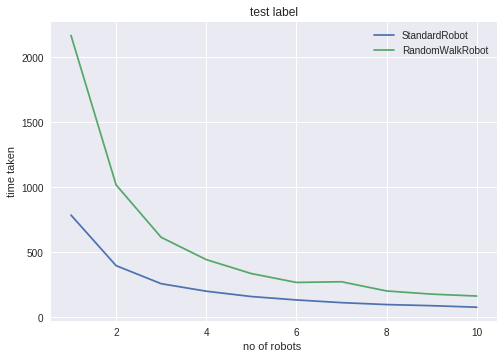

In [0]:
showPlot1('test label','no of robots ','time taken')

Plotting cleaning time for a room of width: 10 by height: 30
Plotting cleaning time for a room of width: 20 by height: 15
Plotting cleaning time for a room of width: 25 by height: 12
Plotting cleaning time for a room of width: 50 by height: 6


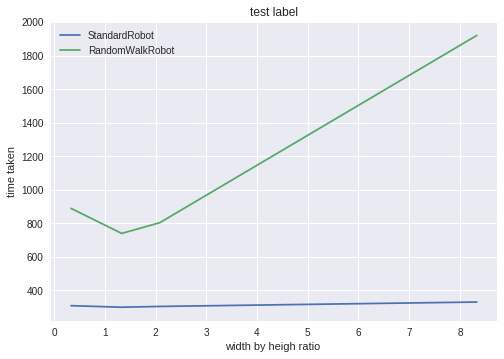

In [0]:
showPlot2('test label','width by heigh ratio ','time taken')

####INFERENTIAL STATISTICS

We draw sample from a population and based on that sample , make inferences about the entire population.


Population : a set of examples

Sample : a proper subset of a population.

Goal : Estimate some statistics about the population based on statistics about the sample.

Key Fact: If the sample is random , it tends to exibit the same properties as the population from which it is drawn.

Confidence in the estimates depends upon two things

1. size of the sample (greater the size more is the confidence)
2. variance of sample (less is the variance more is the confidence)

As the variance grows, we need larger samples to have the same degree of confidence.


####Simulating a Roulette

In [0]:
#  FairRoulette class 
import random

class FairRoulette(object):
    ''' Has an even chance of winning.
        upon initilization defines the 36 pockets 
        set odds or red and black to 1.0 
        set odds of winning pocket to len of pocket-1
        has methods to spin the roulette, check if ball landed on black
        or Red and methods to return amount if bet won on black,red or pocket.
    '''
    
    def __init__(self):
        
        # represents 36 slots of the roulette.
        self.pockets=[i for i in range(1,37)]
        
        self.ball = None
        #betting on color
        self.blackOdds,self.redOdds = 1.0,1.0
        
        #betting on pocket
        self.pocketOdds = len(self.pockets) -1.0
        
    
    def spin(self):
        '''Simulate a spin of the roulette
           it sets the ball position 1 out of the given pockets 
           after a spin
        '''
        self.ball = random.choice(self.pockets)
    
    
    def isBlack(self):
        '''to check if the ball has landed/stopped on black positon
        '''
        # uninitialized ball i.e without first spin
        if type(self.ball)!= int:
            return False
        
        # even digits between (0 and 11),(18 and 28) are black
        #
        if ((self.ball>0 and self.ball <=10) \
            or (self.ball>18 and self.ball<28)):
            return self.ball%2 == 0
        else:
            # odd balls between (11 and 17) ,(29 and 36) and black
            return self.ball%2 == 1
            
    def isRed(self):
        '''to check if the ball has landed/stopped on Red position
        '''
        return type(self.ball) == int and not self.isBlack()
    
    def betBlack(self,amt):
        '''gives amount earned if ball lands on black
        returns negative amount if ball does not land of black
        amt : amount bet
        '''
        if self.isBlack():
            return amt*self.blackOdds
        else:
            return -amt
            
    def betRed(self,amt):
        '''gives amount earned if ball lands on Red
           amt : amount bet
        '''
        if self.isRed():
            return amt*self.redOdds
        else:
            return -amt
        
    def betPocket(self,pocket,amt):
        '''gives amount earned if ball lands on a given pocket
           pocket : the pocket number from 1 to 36
           amt : amount bet
        '''
        if str(pocket) == str(self.ball):
            return amt*self.pocketOdds
        else:
            return -amt
        
    def __str__(self):
        '''over write the str function to give a meaningful name when
        print used on FairRoulette objects'''
        return 'Fair Roulette'

In [0]:
#### define a function to spin the roulette


def playRoulette(game,numSpins,toPrint= True):
    '''
    game : is the FairRoulette object
    numSpins : no of spins to be done
    toPrint : prints expected returns , by default set to True
    returns a tuple with the expected returns fractions on Red,Black and Pocket
    '''
    luckyNo = '4'
    bet = 1.0
    totRed,totBlack,totPocket= 0.0,0.0,0.0
    
    for _ in range(numSpins):
        #spin the roulette
        game.spin()
        totRed += game.betRed(bet)
        totBlack += game.betBlack(bet)
        totPocket += game.betPocket(luckyNo,bet)
        
    if toPrint:
        print(numSpins,' spins for a ',game)
        print('Expected return on Red ',str(100*totRed/numSpins),' %')
        print('Expected return on Black ',str(100*totBlack/numSpins),' %')
        print('Expected return on Pocket ',str(100*totPocket/numSpins),' %')
    
    return (totRed/numSpins, totBlack/numSpins, totPocket/numSpins)
        

In [0]:
play= FairRoulette()
playRoulette(play,10000000)

10000000  spins for a  Fair Roulette
Expected return on Red  0.0554092  %
Expected return on Black  -0.0554092  %
Expected return on Pocket  0.0001448  %


(0.0554092, -0.0554092, 0.0001448)

**Law of large number i.e Bernoulli's Law**.
--- Most import law in statistics

In repeated independent tests with the same actual probability p of a particular outcome in each test, the chance that the fraction of times that outcome occurs differs from p converges to zero as the number of trials goes to infinity.

This does not imply that if deviations from expected behaviour occur, these deviations are likey to be evened out by opposite deviations in the future.(Gambler's fallacy )


**Regression to the Mean**(Francis Galton)

-- Following an extreme random event, the next random event is likely to be less extreme.

Eg: if you spin a fair roulette wheel 10 times and get 100% reds, that is an extreme event(probability 1/1024)
then it is  like that in the next 10 spins, we will get fewer than 10 reds

In [0]:
## creating the american and european roulette wheel.
#American has 2 extra numbers and both have same color green
#European has 1 extra number and has the color green.


class EuRoulette(FairRoulette):
    '''European roulette inherits from the Fair Roulette
    
    '''
    def __init__(self):
        #calling the init method of FairRoulette class
        FairRoulette.__init__(self)
        #add the extra zero to the pockets there by increasing the
        # no of pockets to 37.
        self.pockets.append('0')
        
    def __str__(self):
        return 'European Roulette'
    

In [0]:

class AmRoulette(EuRoulette):
    '''American roulette inherits from the EuRoulette
    adds an extra pocket 00'''
    
    def __init__(self):
        EuRoulette.__init__(self)
        self.pockets.append('00')
        
    #overwrite the __str__ so that printing object will show American Roulette
    def __str__(self):
        return 'American Roulette'

In [0]:
def findPocketReturn(game,numTrials,trialSize,toPrint):
    '''fun to capture the pocketReturns for different type of
    Roulette for each trial
    game : the object of type Roulette
    numTrials : no of trials
    trailSize : no spins 
    toPrint : if set to True prints info.
    '''
    
    pocketReturns =[]
    
    for t in range(numTrials):
        #returns a tuple with return fractions 
        trialVals = playRoulette(game,trialSize,toPrint)
        #take only the pocket return for each trail
        pocketReturns.append(trialVals[2])
        
    return pocketReturns
        

Sampling Space of possible outcomes

--Never possible to guarantee perfect accuracy through sampling.

--Not to say that an estimate is not precisely correct

-- How many samples do we need to look at before we can have justified confidence on our answer?
 
 -- This depends on the variance in the underlying distribution. 
 
** Variance** is a measure of how much spread there is in the possible different outcomes.


Standard deviation is the square root of the variance.

**Standard deviation should always be considered relative to mean.**

Standard deviation tells us what fraction of the values are close to the mean.
If many values are relatively close to the mean , the standard deviation is small.
if all values are the same, then the standard deviation is 0.

**Confidence level and intervals.**

Choose a standard deviation in mean to talk about how much confidence we should have that a sample mean is close to the population mean. 

Instead of estimating an unknown parameter by a single value(e.g the mean of a set of trials), a 
confidence interval provides a range that is likely to contain the unknown value and a confidence that the unknown value lays within that range.

Eg: The return on betting on 2 twenty times in European roulette is -3.3% . The margin of error is +/- 1 percent point with a 95% level of confidence.

It means if we were to conduct an infinte number of experiments of 20 spins of the wheel, in 95% of those experiments , my return would be between minus 2.3% and minus 4.3%.

Together, the confidence interval and the confidence level indicate the reliablility of the estimate.
Almost always , increasing the confidence level (95%) will widen the confidence interval. 

Empirical rule
under below assumptions
The mean estimation error is zero
The distribution of the errors in the estimates in normal.
(Gaussian Distribution)

~68% of data within 1 standard deviation of mean.

~95% of data within 1.96 standard deviation of mean.

~99.7% of data within 3 standard deviation of mean.


In [0]:
#calculating standard deviation on a list of strings.

def stdDevOfLengths(L):
    
    if len(L)==0:
        return float('NaN')
    else:
        #calculate mean
        Strlen = [len(element) for element in L]
        mean = sum(Strlen)/float(len(Strlen))
        tot = 0.0
        for sLen in Strlen:
            tot += (sLen - mean)**2
    std = (tot/len(Strlen))**0.5
    return std

def getMeanAndStd(X):
    mean = sum(X)/float(len(X))
    tot = 0.0
    for x in X:
        tot += (x - mean)**2
    std = (tot/len(X))**0.5
    return mean, std

In [5]:
L = []

print(stdDevOfLengths(L))

nan


In [10]:
L = [10, 4, 12, 15, 20, 5]

print(getMeanAndStd(L))

(11.0, 5.5377492419453835)


The **coefficient of variation** is the standard deviation divided by the mean. Loosely, it's a measure of how variable the population is in relation to the mean.

A **histogram** is a depiction of the frequence of a distribution. It tells as how often a random variable has taken on a value in some range.
eg:
how often the fraction of times a coin came up heads between the ranges of 0.4 and 0.5.

**Defining distributions**

A probability distribution captures the notion of relative frequency by giving the probability of a random value taking on a value within a range.

Probability distributions two groups
Discrete probability distributions 
continuous probability distributions based on whether they define a probabilty distribution for a discrete or a continuous random variable.


Since there are an infinite number of possible values, the probability of the continuous random variable taking on a specific value is usually 0. So instead of listing the probability of each value we use a **PDF**(probability density function) it describes the probability of a random variable lying between two values.


A probability distribution captures notion of relative frequency with which a random variable takes on certain values.

-- Discrete random variables drawn from finite set of values

-- continuous random variables drawn from reals between two numbers 


**PDF**

---Distributions defined by probability density functions

--- Probabililty of a random variable lying between two values.

--- Defines a curve where the values on the x-axis lie between min and max value of the variable.

-- The area under the curve between two points , is probability of example falling within that range.